**Predicción del Precio de Viviendas en California.**

**Capítulo 1: Arquitectura de las Redes Neuronales**

Código inicial para cargar los datos:

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

print('Descripción del dataset:')
print(california.DESCR[:1500])



Descripción del dataset:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. cen

In [ ]:
print(california.feature_names)
print(california.DESCR)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousan

**1.**

a) En este caso el numero de registros son **20640**

b) Cada observación tiene **8** caracteristicas

c) El vector de caracteristicas es:
$$
\mathbf{X} =
\begin{bmatrix}
\text{MedInc} \\
\text{HouseAge} \\
\text{AveRooms} \\
\text{AveBedrms} \\
\text{Population} \\
\text{AveOccup} \\
\text{Latitude} \\
\text{Longitude}
\end{bmatrix}
$$


---
<br>
**2.**

**MedInc:** Ingreso medio de los hogares en el bloque censal (medido en decenas de miles de dolares).

**HouseAge:** Edad mediana de las viviendas en el bloque censal.

**AveRooms:** Numero promedio de habitaciones por hogar en el bloque censal.

**AveBedrms:** Numero promedio de dormitorios por hogar en el bloque censal.

**Population:** Numero total de personas que viven en el bloque censal.

**AveOccup:** Numero promedio de personas por hogar en el bloque censal.

**Latitude:** Latitud geografica del bloque censal, que indica su ubicación norte-sur en California.

**Longitude:** Longitud geografica del bloque censal, que indica su ubicación este-oeste en California.



---
<br>

**3.**

La variable objetivo es el valor medio de las viviendas en los distritos de California, expresado en cientos de miles de dolares (100.000 dólares).


---
<br>
**4.**

Este es un problema de regresión, dado que queremos obtener el valor de una vivienda en función de sus caracteristicas ya mencionadas


**Normalización de datos:**

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_caracteristicas = X_train_scaled.shape[1]

**d)** La normalización de las caracteristicas es importante porque garantiza que todas las variables de entrada tengan escalas comparables, evitando que aquellas con valores numericos más grandes dominen el proceso de aprendizaje.

En el descenso del gradiente, esto hace que los pasos de actualización sean desbalanceados, provocando que el aprendizaje sea más lento o inestable.
Al normalizar las caracteristicas, el descenso del gradiente avanza de forma mas uniforme, lo que permite una convergencia mas rapida y estable del entrenamiento.

**e)** StandardScaler() se encarga de normalizar la distribucion de los datos, tal que queden centrados en 0, y con dispersión 1. $$x_j^{\,\prime} = \frac{x_j - \mu_j}{\sigma_j}$$ Este proceso se hace para cada dato del conjunto de entrenamiento, de esta forma, se obtiene un conjunto con las mismas dimensiones.

**f)** La razón por la cual solo se aplica fit( ) los datos de entrenamiento y no a los de prueba, es justamente porque no queremos que en el entrenamiento se incluyan valores con los que vamos a realizar la prueba, de esta manera logramos un aislamiento entre estos 2 conjuntos. El transform( ) si se aplica sin problema.






In [ ]:
def inicializar_parametros(n_caracteristicas):
  '''
  Inicializa los pesos y el sesgo del perceptrón.

  Parámetros:
  -----------
  n_caracteristicas : int
  Número de características de entrada

  Retorna:
  --------
  w : numpy array de forma (n_caracteristicas, 1)
  b : float (escalar)
  '''

  # COMPLETE EL CÓDIGO AQUÍ
  # Inicialice w con valores aleatorios pequeños (usar np.random.randn)
  # Inicialice b en cero
  w = 0.045*np.random.randn(n_caracteristicas, 1)
  b = float(0)
  return w, b

**g)** si los valores son cercanos a 0, se garantiza que no se alcanza una saturacion muy rapida de la funcion de activacion, puesto que permite que el gradiente aumente y lograr una correcta evolucion. Ademas, iniciar todos los pesos con el mismo valor introduce un comportamiento de simetria indeseable a la hora de entrenar el modelo

**h)** w es un vector columna de en este caso 8 componentes, tal que sus dimensiones son (8,1)

**i)** en este caso que b sea 0 no afecta la evolucion del gradiente, en contraste a se inicia con un valor grande que puede saturar la funcion de activacion

In [ ]:
#codigo para verificar las dimensiones del vector w
w= inicializar_parametros(8)[0]
print(w.shape)

(8, 1)


In [ ]:
def propagacion_adelante(X, w, b):

  '''
  Calcula la suma ponderada para todas las observaciones.

  Parámetros:
  -----------
  X : numpy array de forma (m, n)
  m observaciones, n características
  w : numpy array de forma (n, 1)
  Vector de pesos
  b : float
  Sesgo

  Retorna:
  --------
  y_pred : numpy array de forma (m, 1)
  Predicciones del modelo
  '''

  # COMPLETE EL CÓDIGO AQUÍ
  # Calcule z = X @ w + b (producto matricial)

  z = X @ w +b
  y_pred = z
  return y_pred

**j)** X tiene dimensiones (m,n) multiplicado por w que tiene dimensiones de  (n,1) se traduce en: (m,n)*(n,1), la unica forma que el producto estaría bien definido es para X@w. esto resulta en un vector de dimensiones (m,1).

**k)** Como es un problema de regresión y no de clasificación, la función de activación recomendada es la identidad, que cumple y_pred = z. Esto porque solo queremos saber la respuesta de una variable a la variacion de otros parametros.

**l)**

In [ ]:
w,b = inicializar_parametros(8)
y_pred = propagacion_adelante(X_train_scaled[0:10], w, b)
print(y_pred[0:10])
print(y_pred[5][0])
print("\n")

print(y_train[0:10])
print(y_train[5])

Respuesta predicha:
[[ 0.01885408]
 [ 0.02933514]
 [ 0.00275105]
 [ 0.03401993]
 [-0.0093871 ]
 [-0.02558981]
 [ 0.02014833]
 [ 0.00550068]
 [ 0.02225742]
 [-0.09104416]]
-0.025589805899004735


Respuesta real:
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
2.648


Estas son unas predicciones muy malas. Esto porque se hace el calculo con los valores iniciales de los pesos y el sesgo, valores que se seleccionaron aleatoriamente con numeros muy pequeños ademas.

**m)**
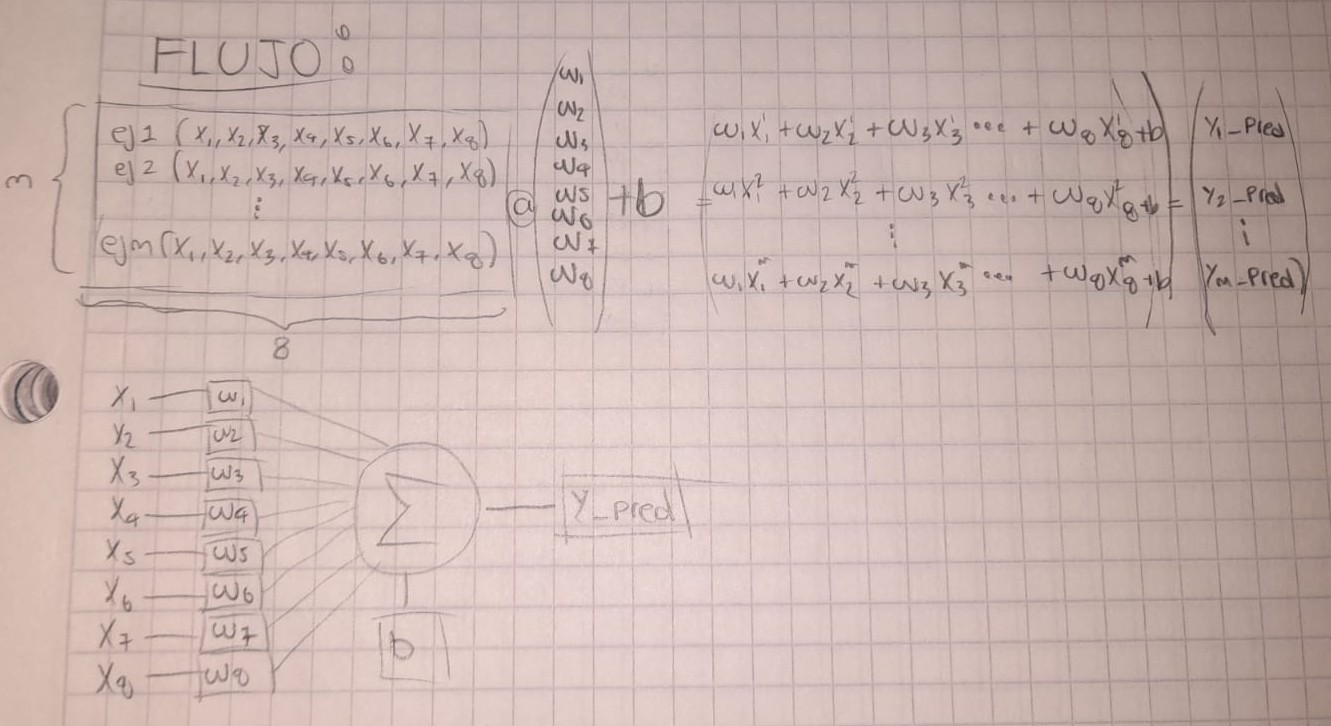

In [ ]:
def calcular_perdida(y_pred, y_real):
    '''
    Calcula el error cuadrático medio.

    MSE = (1/m) * sum((y_pred - y_real)^2)
    '''
    # COMPLETE EL CÓDIGO AQUÍ

    m = y_real.shape[0]
    mse = (1/m)*np.sum((y_pred - y_real.reshape(-1,1))**2)
    return mse



**n)** se prefiere usar la diferencia al cuadrado porque de esta manera se penaliza en gran medida, valores muy alejados y se preocupa poco de valores un poco mas cercanos.

**o)** la perdida inicial para 10 ejemplos es 6.8318

**p)** el valor absoluto no es diferenciable en 0, por otro lado, la diferencia al cuadrado es diferenciable en todo el dominio. Por eso el descenso del gradiente puede fallar en algun momento si se usa el MAE

**q)** que la funcion de perdida se estabilice puede significar varias cosas. Entre ellas que ya se llego al minimo global, y que por mas que se avance en el entrenamiento no va a disminuir mas. Puede significar que se llegó a un minimo local, y no está bajando pero puede llegar a bajar mas.

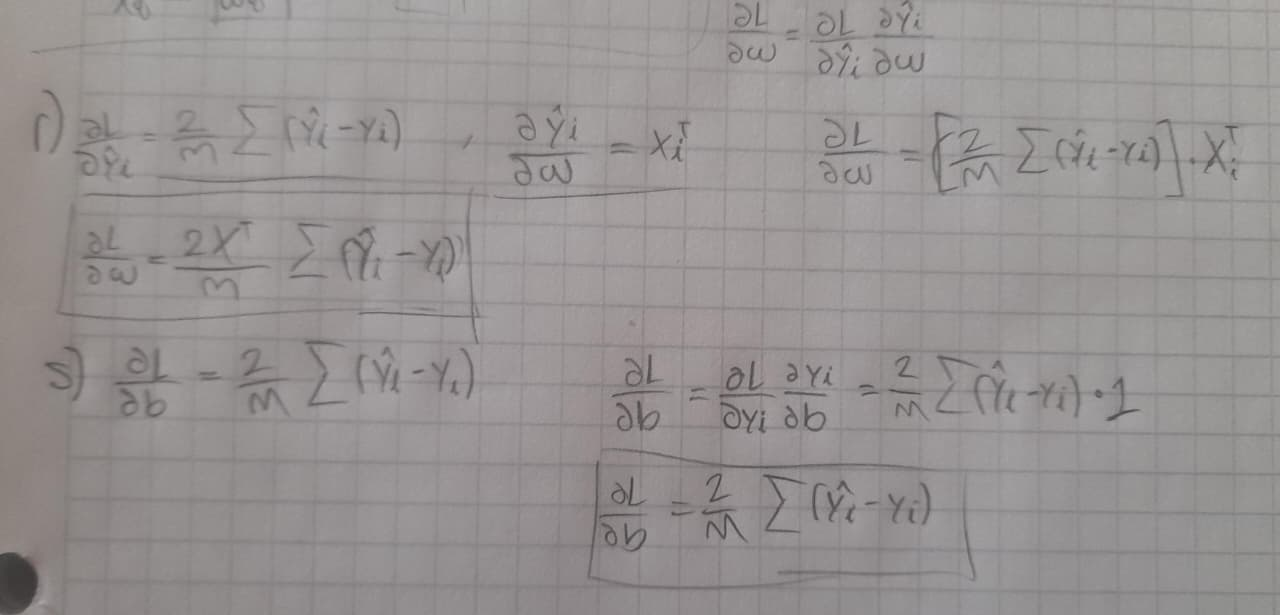

**t)** esto es por su definicion misma. Es un operador que evalua la funcion en ese punto y realizando la derivada en cada componente, arroja la direccion en la cual se tiene la distancia mas corta hasta el punto maximo. Que se traduce en la direccion de maximo ascenso, que en terminos de la analogia de la montaña, puede decirse que es la ruta que minimiza la distancia a la cumbre

**u)** el signo negativo significa que queremos bajar de la montaña, no subirla. Si el gradiente nos da la direccion de maximo ascenso su negativo (girar 180° ese vector) nos da el maximo descenso

In [ ]:
def calcular_gradientes(X, y_pred, y_real):
  '''
  Calcula los gradientes de la pérdida respecto a w y b.

  Parámetros:
  -----------
  X : numpy array de forma (m, n)
  y_pred : numpy array de forma (m, 1)
  y_real : numpy array de forma (m, 1)

  Retorna:
  --------
  dw : numpy array de forma (n, 1) - gradiente respecto a w
  db : float - gradiente respecto a b
  '''
  m = X.shape[0]
  error = y_pred - y_real.reshape(-1, 1)

  # COMPLETE EL CÓDIGO AQUÍ
  dw = (2/m)*X.T@error

  db = (2/m)*np.sum(error)

  return dw, db

**w)** dw y w deben tener la misma forma para que w tiene forma de (8,1) y dw al ser el producto de (8,m)@(m,1) el resultado es tambien (8,1). Es importante que tengan la misma forma para que la diferencia del siguiente paso se pueda ejecutar sin problema

**x)** si los valores calculados son iguales a los estimados, la diferencia será 0. Y entonces tanto dw como db será 0. Y esto significa que estamos en el minimo global, y no hay forma de descender mas

In [ ]:
def actualizar_parametros(w, b, dw, db, learning_rate):
  '''
  Actualiza los pesos y sesgo usando gradiente descendente.

  w_nuevo = w - learning_rate * dw
  b_nuevo = b - learning_rate * db
  '''
  # COMPLETE EL CÓDIGO AQUÍ
  w = w -learning_rate*dw
  b = b -learning_rate*db

  return w, b

**z)** este valor nos dice que tan grande o que tan pequeños serán los pasos que demos para "bajar la montaña". si es muy grande vamos a estar soprepasando el punto optimo, no devolvemos y seguramente volvamos a rebasarlo. Si por otro lado es muy pequeño, tardará mucho tiempo en llegar al valor optimo

**aa)**

In [ ]:
w, b = inicializar_parametros(8)
y_pred = propagacion_adelante(X_train_scaled[0:10], w, b)
mse = calcular_perdida(y_pred[0:10], y_train[0:10])
print(mse)
dw, db = calcular_gradientes(X_train_scaled[0:10], y_pred[0:10], y_train[0:10])
w,b = actualizar_parametros(w, b, dw, db, 0.01)

y_pred = propagacion_adelante(X_train_scaled[0:10], w, b)
mse = calcular_perdida(y_pred[0:10], y_train[0:10])
print(mse)

6.6689609053542656
6.175162824575837


el mse inicial fue 6.6689 luego de una iteracion es 6.1752

In [ ]:
def entrenar_perceptron(X_train, y_train, learning_rate, epochs):
  '''
  Entrena un perceptrón para regresión.

  Parámetros:
  -----------
  X_train : datos de entrenamiento
  y_train : etiquetas de entrenamiento
  learning_rate : tasa de aprendizaje
  epochs : número de épocas (iteraciones sobre todo el dataset)

  Retorna:
  --------
  w, b : parámetros entrenados
  historial_perdida : lista con la pérdida en cada época
  '''
  n_caracteristicas = X_train.shape[1]
  w, b = inicializar_parametros(n_caracteristicas)
  historial_perdida = []

  for epoca in range(epochs):
    # COMPLETE EL CÓDIGO AQUÍ
    # 1. Propagación adelante
    y_pred = propagacion_adelante(X_train_scaled, w, b)
    # 2. Calcular pérdida y guardar en historial
    perdida_actual = calcular_perdida(y_pred, y_train)
    historial_perdida = historial_perdida + [perdida_actual]
    # 3. Calcular gradientes
    dw, db = calcular_gradientes(X_train_scaled, y_pred, y_train)
    # 4. Actualizar parámetros
    w,b = actualizar_parametros(w, b, dw, db, 0.01)

    if epoca % 100 == 0:
      print(f'Época {epoca}, Pérdida: {perdida_actual:.4f}')

  return w, b, historial_perdida

w_entrenado, b_entrenado, historial_perdida = entrenar_perceptron(X_train, y_train, 0.01, 1000+1)
print(w_entrenado,"\n")
print(b_entrenado)

Época 0, Pérdida: 5.6872
Época 100, Pérdida: 0.7133
Época 200, Pérdida: 0.5966
Época 300, Pérdida: 0.5742
Época 400, Pérdida: 0.5592
Época 500, Pérdida: 0.5483
Época 600, Pérdida: 0.5403
Época 700, Pérdida: 0.5345
Época 800, Pérdida: 0.5303
Época 900, Pérdida: 0.5271
Época 1000, Pérdida: 0.5248
[[ 0.86086722]
 [ 0.1507098 ]
 [-0.25761414]
 [ 0.28514175]
 [ 0.00728149]
 [-0.0435653 ]
 [-0.67677527]
 [-0.64803947]] 

2.0719469339614123


**cc)**

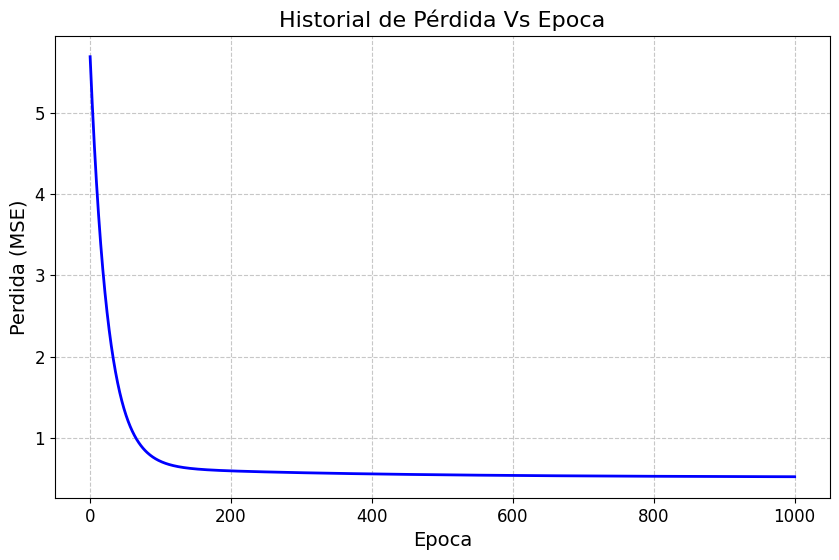

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(historial_perdida, color='blue', linewidth=2)
plt.title('Historial de Pérdida Vs Epoca', fontsize=16)
plt.xlabel('Epoca', fontsize=14)
plt.ylabel('Perdida (MSE)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**dd)** es evidente que el modelo convergió puesto que se ve como desde la epoca 3000 no hay un descenso importante de la funcion de perdida. Se puede decir que con 4000 epocas de entrenamiento hubiese sido suficiente para tener un modelo util

**ee)**

Época 0, Pérdida: 5.7131
Época 100, Pérdida: 0.7215
Época 200, Pérdida: 0.6016
Época 300, Pérdida: 0.5774
Época 400, Pérdida: 0.5612
Época 500, Pérdida: 0.5495
Época 600, Pérdida: 0.5410
Época 700, Pérdida: 0.5349
Época 800, Pérdida: 0.5304
Época 900, Pérdida: 0.5271
Época 1000, Pérdida: 0.5247
Época 0, Pérdida: 5.6403
Época 100, Pérdida: 0.7075
Época 200, Pérdida: 0.5928
Época 300, Pérdida: 0.5715
Época 400, Pérdida: 0.5573
Época 500, Pérdida: 0.5470
Época 600, Pérdida: 0.5395
Época 700, Pérdida: 0.5339
Época 800, Pérdida: 0.5299
Época 900, Pérdida: 0.5269
Época 1000, Pérdida: 0.5247
Época 0, Pérdida: 5.7773
Época 100, Pérdida: 0.7261
Época 200, Pérdida: 0.6056
Época 300, Pérdida: 0.5808
Época 400, Pérdida: 0.5640
Época 500, Pérdida: 0.5518
Época 600, Pérdida: 0.5429
Época 700, Pérdida: 0.5364
Época 800, Pérdida: 0.5317
Época 900, Pérdida: 0.5282
Época 1000, Pérdida: 0.5256
Época 0, Pérdida: 5.6353
Época 100, Pérdida: 0.6989
Época 200, Pérdida: 0.5864
Época 300, Pérdida: 0.5666
Época 

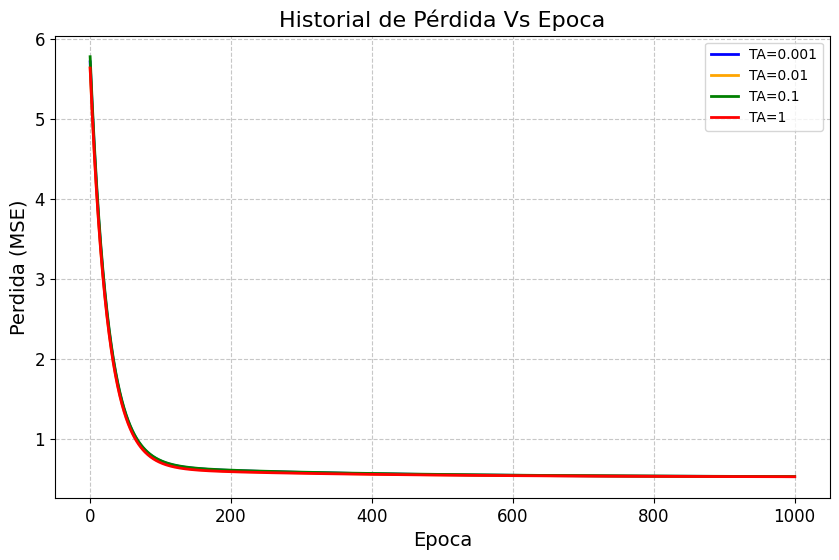

In [ ]:
plt.figure(figsize=(10, 6))

w_entrenado, b_entrenado, historial_perdida = entrenar_perceptron(X_train, y_train, 0.001, 1000+1)
plt.plot(historial_perdida, color='blue', linewidth=2, label='TA=0.001')

w_entrenado, b_entrenado, historial_perdida = entrenar_perceptron(X_train, y_train, 0.01, 1000+1)
plt.plot(historial_perdida, color='orange', linewidth=2, label='TA=0.01')

w_entrenado, b_entrenado, historial_perdida = entrenar_perceptron(X_train, y_train, 0.1, 1000+1)
plt.plot(historial_perdida, color='green', linewidth=2, label='TA=0.1')

w_entrenado, b_entrenado, historial_perdida = entrenar_perceptron(X_train, y_train, 1, 1000+1)
plt.plot(historial_perdida, color='red', linewidth=2, label='TA=1')

plt.title('Historial de Pérdida Vs Epoca', fontsize=16)
plt.xlabel('Epoca', fontsize=14)
plt.ylabel('Perdida (MSE)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

las diferencias en el resultado son minimas. No hay una diferencia aprecible como para asegurar que una es mejor que otra. Todas convergen y lo hacen para casi la misma cantidad de epocas

**ff)**

In [ ]:
w_entrenado, b_entrenado, historial_perdida = entrenar_perceptron(X_train, y_train, 0.001, 1000+1)
y_pred_test = X_test_scaled @ w_entrenado + b_entrenado
print(y_pred_test[-10:])
print()
print(y_test[-10:])

Época 0, Pérdida: 5.5566
Época 100, Pérdida: 0.7085
Época 200, Pérdida: 0.5966
Época 300, Pérdida: 0.5744
Época 400, Pérdida: 0.5593
Época 500, Pérdida: 0.5484
Época 600, Pérdida: 0.5404
Época 700, Pérdida: 0.5345
Época 800, Pérdida: 0.5302
Época 900, Pérdida: 0.5271
Época 1000, Pérdida: 0.5248
[[4.3504323 ]
 [1.10118357]
 [1.95984691]
 [4.15532283]
 [5.70880786]
 [2.0211479 ]
 [2.07268185]
 [4.42535836]
 [1.30744207]
 [1.95643063]]

[4.338   0.729   1.085   4.526   4.676   2.633   2.668   5.00001 0.723
 1.515  ]


**gg)**

In [ ]:
mse = np.mean((y_pred_test - y_test.reshape(-1,1))**2)
print(mse)

0.5548212650711372


el mse encontrado para el conjunto de prueba (0.5548) es casi igual al coseguido por el conjunto de entrenamiento (0.5247). Se puede concluir que el conjunto de entrenamiento generaliza apropiadamente el conjunto de prueba. Ademas, no hay muestras de sobre ajuste

**hh**

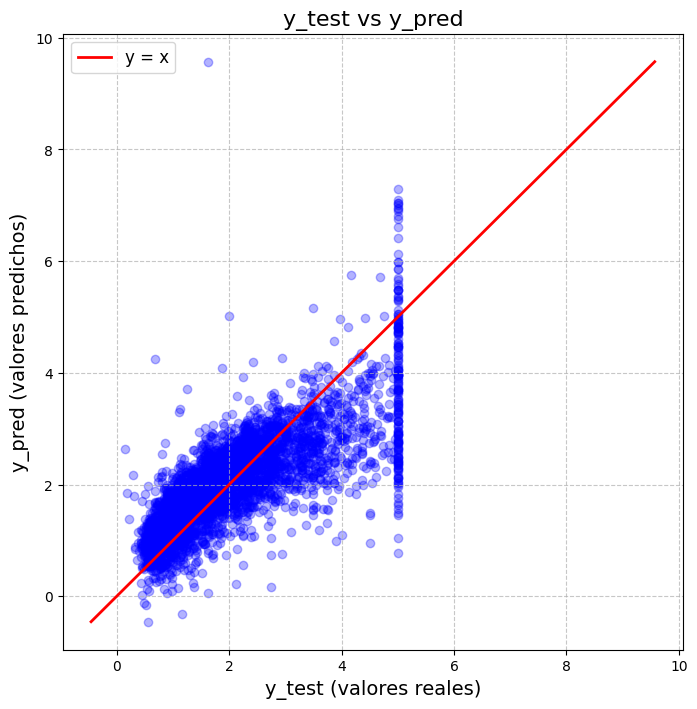

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.3, color='blue')

# Línea ideal y = x
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='y = x')

plt.title('y_test vs y_pred', fontsize=16)
plt.xlabel('y_test (valores reales)', fontsize=14)
plt.ylabel('y_pred (valores predichos)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

en terminos generales la linea se acerca y podría decirse que es una buena representacion. Aun así hay una importante dispersion en torno a la linea de referencia. Se evidencia tambien la presencia de outliers, datos muy alejados. Y otro comportamiento raro es la existencia de una linea vertical en 5 para los valores reales

**ii)**

In [ ]:
# Fórmula R²
SS_res = np.sum((y_test - y_pred_test.flatten())**2)
SS_tot = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (SS_res / SS_tot)
print(R2)

0.5766044995998636


R2 representa una medida sobre que tanto una variable explica las variaciones de otra. En este caso dice que el 57% de los datos reales son explicados por los valores predichos. Lo cual es un valor medianmente eceptable. pero que se explica por lo mencionado anteriormente, algo de dispersion o outliers

**jj)** un perceptron simple unicamente puede modelar relaciones lineales entre las caracterisiticas de entrada y un valor resultado (en este caso el precio de la vivienda)

**kk)** Si se tuviera un caso en que la variable dependiente no cumpliera una relacion lineal con las independientes, seria necesario incluir una capa oculta. Esto con el fin de incluir justamente un componente no lineal que explique este tipo de relaciones.
Si se incluye una  capa oculta con al menos una nurona mas vamos a tener una nueva ecuacion que al aplicarle determinada funcion de activacion permite doblar esa recta y acomodarse a esa no linealidad

**ll)** el teorema de aproximacion universal afirma que cualquier red neuronal con una unica capa oculta puede aproximar cualquier relacion. Pero este teorema no da in formacion sobre cuantos perceptrones se deben usar, es decir, esto se cumple pero generalmetne requiere muchisimos perceptrones.
Incluir varias capas ayuda a llegar al mismo resultado pero con una reduccion en el numero de nuronas requeridas

**Fuentes**

+https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

+https://numpy.org/doc/stable/user/index.html

+https://www.deeplearningbook.org/contents/ml.html

+http://neuralnetworksanddeeplearning.com/chap2.html

+An Introduction to Statistical Learning

+Inteligencia artificial Parte I: fundamentos

+https://deeplearningwithpython.io/chapters/chapter04_classification-and-regression/